# Gradient Maps

<a href="https://colab.research.google.com/github/warwickdatascience/subject-examples/blob/master/python/maths/maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### Problem Statement

One way of visualising the gradient of a function $f:\mathbb{R}^2\rightarrow \mathbb{R}$ is to plot it in three dimensions. This method works best when visualised interactively, so that you have the ability to move around the 3D surface. When restricted to a static output, a preferable approach is the gradient map. This method is inspired by [domain colouring](https://en.wikipedia.org/wiki/Domain_coloring) but replaces the argument and magnitude of complex outputs with that of the gradient. In this notebook, we will generate a gradient map for an arbritary function, using the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) to approximate derivatives. We will use $\frac{2}{\pi}\arctan(r)$ as our lightness mapping function, as is conventional. 

### Resources

No resources are required.

### Non-course Techniques

We use the packages `PIL` and `colorsys` to create the final image, both of which are built-in modules. Other than that, all techniques are taken from the Python course, although there is some use of content from the additional notes.

## Setup

We begin by importing any relevant modules.

In [163]:
import math
import colorsys
from PIL import Image

We first have to define the function to generate the colour map for, the domain we will consider it over, and the resolution of our image.

In [173]:
f = lambda x, y: x * y / (x-5) + math.sin((x + y))
# Must be the case that res divides (max - min)
x_min, x_max, x_res = -3, 3, 0.01
y_min, y_max, y_res = -3, 3, 0.01

We will also need a helper function for calculating the sign of an input.

In [165]:
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

## Gradient Calculation

We start by evaluating the function at all points in its domain. We pre-allocate the array with `None` to avoid using multiple appends (which are computationally expensive).

In [166]:
z = [[None for j in range(int((y_max - y_min) / y_res) + 1)]
     for i in range(int((x_max - x_min) / x_res) + 1)]

for i in range(int((x_max - x_min) / x_res) + 1):
    x = x_min + i * x_res
    for j in range(int((y_max - y_min) / y_res) + 1):
        y = y_min + j * y_res
        z[i][j] = f(x, y)

Next, we calculate the x and y gradients using the Sobel operators. Note, since this operator is $3\times 3$, we will have to clip the image slightly.

In [167]:
Gx = [[0 for j in range(int((y_max - y_min) / y_res) - 1)]
       for i in range(int((x_max - x_min) / x_res) - 1)]
Gy = [[0 for j in range(int((y_max - y_min) / y_res) - 1)]
       for i in range(int((x_max - x_min) / x_res) - 1)]

for i in range(int((x_max - x_min) / x_res) - 1):
    for j in range(int((y_max - y_min) / y_res) - 1):
        for i_off in range(-1, 2):
            for j_off in range(-1, 2):
                Cx = sign(i_off) * (2 if j_off == 0 else 1)
                Cy = sign(j_off) * (2 if i_off == 0 else 1)
                Gx[i][j] += Cx * z[i+1 + i_off][j+1 + j_off]
                Gy[i][j] += Cy * z[i+1 + i_off][j+1 + j_off]

## Visualisation

We can now visualise these gradients by mapping them to a colour with hue $\arctan\left(\frac{G_y}{G_x}\right)$ and lightness $\frac{2}{\pi}\arctan\left(\alpha\sqrt{G_x^2 + G_y^2}\right)$, where $\alpha$ is a manually-chosen calibration coefficient.

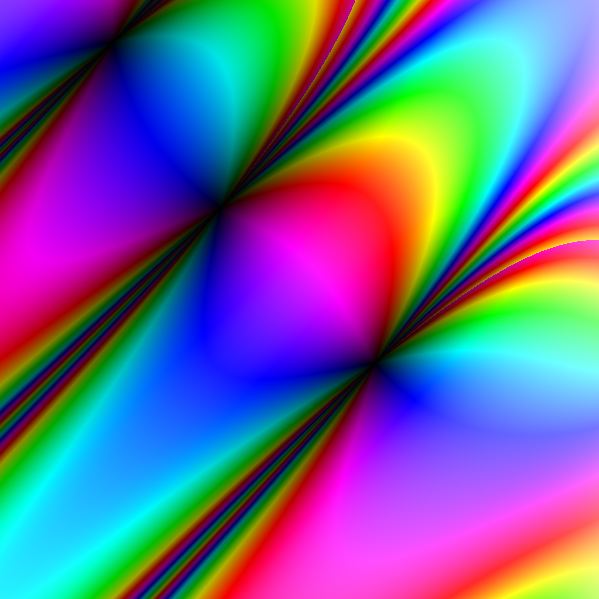

In [172]:
alpha = 10
img = Image.new('RGB', ((int((x_max - x_min) / x_res) - 1),
                        int((y_max - y_min) / y_res) - 1)) 
pixels = img.load()

for i in range(int((x_max - x_min) / x_res) - 1):
    for j in range(int((y_max - y_min) / y_res) - 1):
        pixels[i,j] = tuple([int(255 * v)
        for v in colorsys.hls_to_rgb(
            math.atan2(Gx[i][j], Gy[i][j]),
            2 / math.pi * math.atan(alpha * math.sqrt(Gx[i][j]**2 + Gy[i][j]**2)),
            1
        )])
        
display(img)